In [2]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

In [3]:
file_path = "/content/chatgpt_reviews.csv"
df = pd.read_csv(file_path)

In [4]:
df['Review Date'] = pd.to_datetime(df['Review Date'])
df['Review'].fillna("", inplace=True)

/tmp/ipython-input-1222013985.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Review'].fillna("", inplace=True)


In [5]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0.1:
        return "Positive"
    elif analysis.sentiment.polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['Review'].apply(get_sentiment)

In [6]:
negative_reviews = df[df['Sentiment'] == 'Negative']['Review'].str.lower()
words = " ".join(negative_reviews).split()
filtered_words = [re.sub(r'[^a-z]', '', word) for word in words if len(word) > 3]
common_issues = Counter(filtered_words).most_common(20)

In [7]:
sentiment_over_time = df.groupby([df['Review Date'].dt.date, 'Sentiment']).size().unstack(fill_value=0)

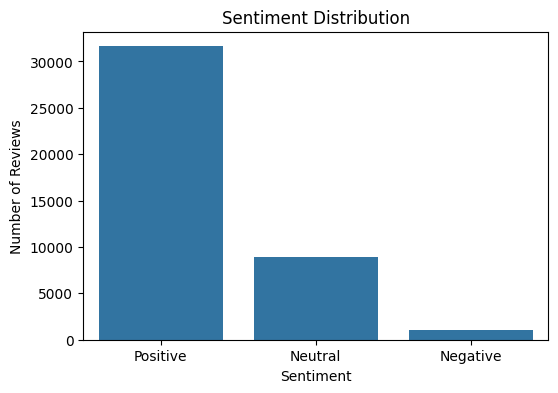

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment', data=df, order=['Positive','Neutral','Negative'])
plt.title("Sentiment Distribution")
plt.ylabel("Number of Reviews")
plt.show()

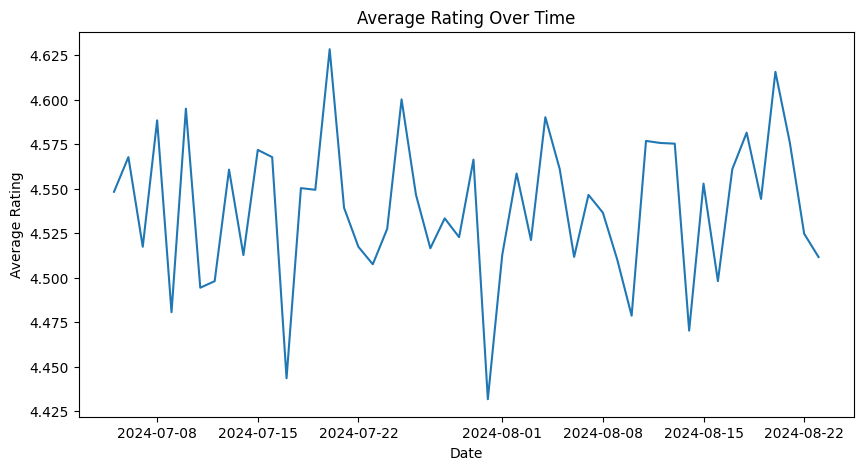

In [9]:
plt.figure(figsize=(10,5))
df.groupby(df['Review Date'].dt.date)['Ratings'].mean().plot()
plt.title("Average Rating Over Time")
plt.xlabel("Date")
plt.ylabel("Average Rating")
plt.show()

<Figure size 1200x600 with 0 Axes>

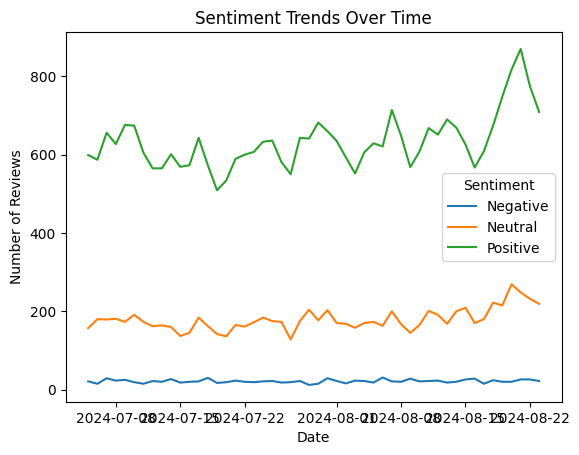

In [10]:
plt.figure(figsize=(12,6))
sentiment_over_time.plot(kind='line')
plt.title("Sentiment Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Reviews")
plt.show()

In [11]:
print("Top 20 Most Common Words in Negative Reviews:")
for word, count in common_issues:
    print(f"{word}: {count}")

Top 20 Most Common Words in Negative Reviews:
this: 279
very: 164
its: 137
that: 131
wrong: 127
with: 97
when: 85
chatgpt: 84
have: 76
even: 75
like: 73
cant: 72
time: 72
just: 72
worst: 69
answer: 66
doesnt: 64
information: 62
dont: 60
give: 57


In [12]:
summary = df.groupby('Sentiment')['Ratings'].agg(['count','mean'])
print("\nSentiment Summary:\n", summary)


Sentiment Summary:
            count      mean
Sentiment                 
Negative    1073  2.456664
Neutral     8946  4.255421
Positive   31625  4.691067
